## **<ins style="color:red">Feature Engineering</ins>**
- ### **<ins style="color:teal">Feature Transformation</ins>**
  - **Missing Value Imputation**
  - **Handling Categorical Features**
  - **Outlier Detection**
  - **Feature Scaling** : Keep columns value in same range. Minimize & Maximize the range.
    - **Standardization**
    - **Normalization**
      - ___Minmax Scale___
      - ___Robust Scaler___ : Good for outliers
- ### **<ins style="color:teal">Feature Construction</ins>**
  - **Feature Constructing(Create New Columns) using existing column.**
- ### **<ins style="color:teal">Feature Selection</ins>**
  - **Select Important Feature**
  - **Backward Selection**
  - **Farward Elimination**
- ### **<ins style="color:teal">Feature Extraction</ins>**
  - **Create new feature from the given features.(Create new different column using existing columns)**
  - **Feature elimination**
  - **PCA**
  - **LDA**

## **<ins style="color:red">Feature Scaling</ins>**
### **<ins style="color:orange">Standardization (Z-Score Normalization)</ins>**
- `X' = (Xi - Mean(X)) / SD(σ)`
  - Mean(Σ X') = 0
  - SD(Σ X') = 1
- `SD = √(Σ(Xi-Mean)^2 / N)`
  - N: total no. of values
  - A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.
 
### **<ins style="color:maroon">When to use Standardization**</ins>
- **K-Means** : Use the `Euclidean distance` measure.
- **K-Nearest-Neighbours** : Measure the distances between pairs of samples and these distances are influenced by the measurement units.
- **Principal Component Analysis(PCA)** : Try to get the feature with maximum variance.
- **Artificial Nural Network** : Apply Gradient Descent
- **Gradient Descent** : Theta calculation becomes faster after feature scaling and the learning rate in the update equation of `Stochastic Gradient Descent` is the same for every parameter.
#### **Do not require to use Standardization**
- **Decision Tree**
- **Random Forest**
- **Gradient Boost**
- **XG Boost**

In [37]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('../data/Ads/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


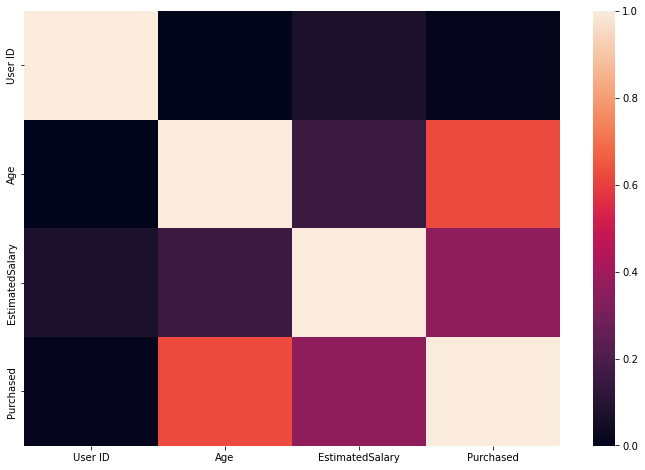

In [40]:
plt.figure(1, figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [41]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
25,15631159,Male,47,20000,1
37,15689425,Male,30,49000,0
74,15592877,Male,32,18000,0
378,15577806,Male,41,87000,1
312,15733964,Female,38,50000,0


In [42]:
df = df.drop(['User ID', 'Gender'], axis=1)

In [43]:
df.sample(5)

,Age,EstimatedSalary,Purchased
177,25,22000,0
222,37,144000,1
120,36,75000,0
190,24,84000,0
140,19,85000,0


In [44]:
X = df.iloc[:,[0, 1]]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [45]:
Y = df.iloc[:,[-1]]
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
X_train.shape, X_test.shape

((280, 2), (120, 2))

### **StandardScaler**

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train) # mean of X_train

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
scaler

StandardScaler()

In [49]:
type(X_train_scaled), type(X_test_scaled)

(numpy.ndarray, numpy.ndarray)

In [50]:
scaler.mean_

array([3.78178571e+01, 6.89785714e+04])

In [51]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [52]:
type(X_train_scaled), type(X_test_scaled)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [53]:
X_train_scaled.tail(5)

,Age,EstimatedSalary
275,-0.465111,1.305165
276,0.210662,-0.295849
277,-0.947805,-1.096355
278,1.658745,1.809187
279,2.141439,-1.037059


In [54]:
X_test_scaled.tail(5)

,Age,EstimatedSalary
115,-0.851266,0.178526
116,0.307200,-0.266200
117,-0.272033,-0.266200
118,0.403739,2.372507
119,1.755284,1.898133


In [55]:
np.round(X_train.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.82,68978.57
std,10.38,33789.03
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,69500.00
75%,46.00,87000.00
max,60.00,150000.00


In [56]:
np.round(X_train_scaled.describe(), 2)

,Age,EstimatedSalary
count,280.00,280.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.91,-1.60
25%,-0.75,-0.77
50%,-0.08,0.02
75%,0.79,0.53
max,2.14,2.40


### **Effect of Scaling**

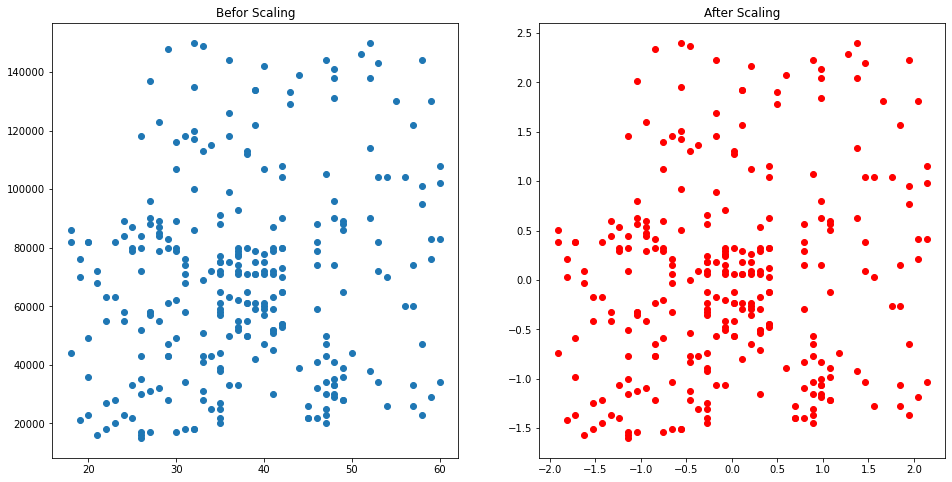

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Befor Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

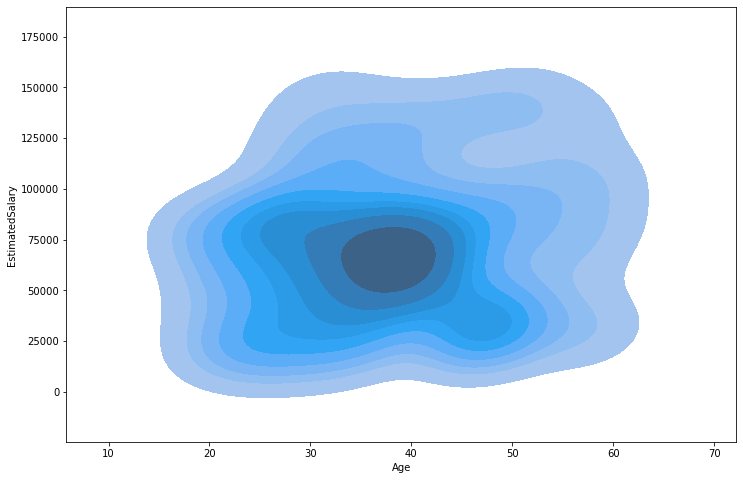

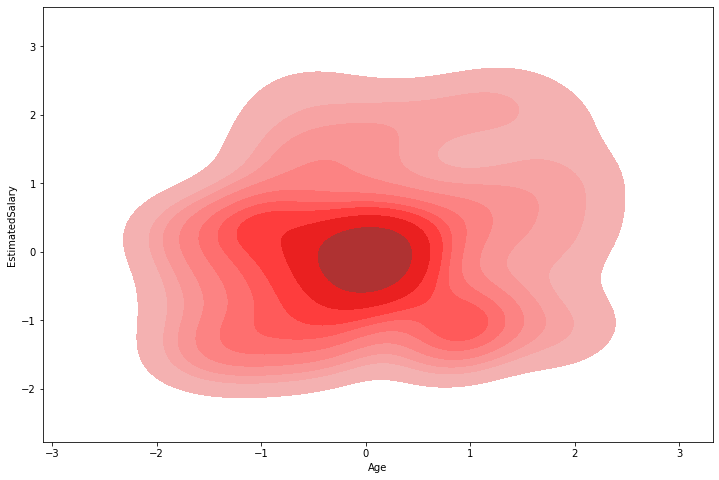

In [58]:
plt.figure(1, figsize=(12, 8))
sns.kdeplot(data=X_train, x='Age', y='EstimatedSalary', fill=True)

plt.figure(2, figsize=(12, 8))
sns.kdeplot(data=X_train_scaled, x='Age', y='EstimatedSalary', color='red', fill=True)

plt.show()

### **Comparison of Distributions**

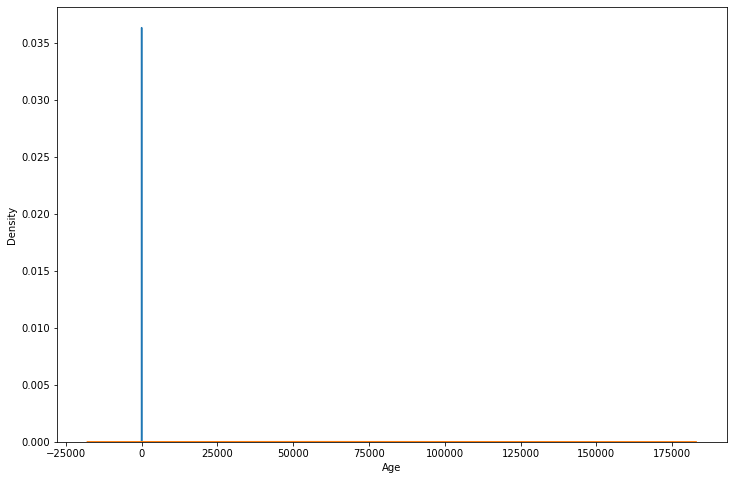

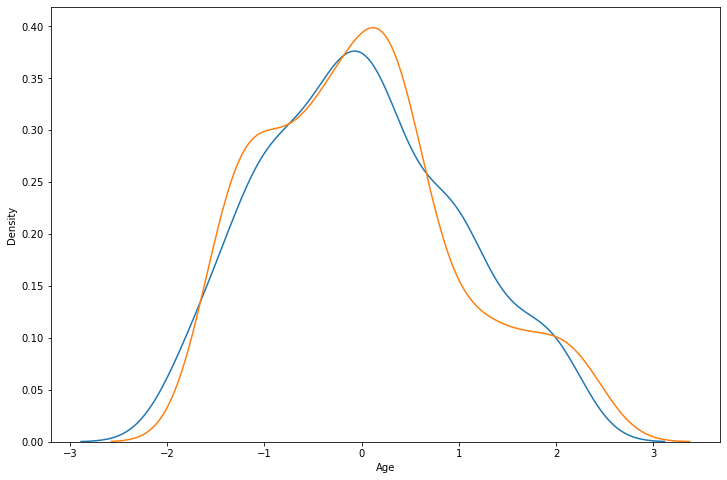

In [59]:
# befor scaling
plt.figure(1, figsize=(12, 8))
sns.kdeplot(data=X_train, x='Age')
sns.kdeplot(data=X_train, x='EstimatedSalary')
plt.show()

# after scaling
plt.figure(2, figsize=(12, 8))
sns.kdeplot(data=X_train_scaled, x='Age')
sns.kdeplot(data=X_train_scaled, x='EstimatedSalary')
plt.show()

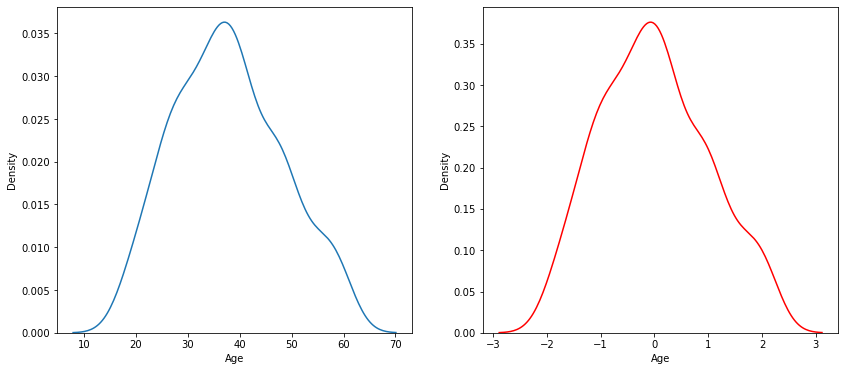

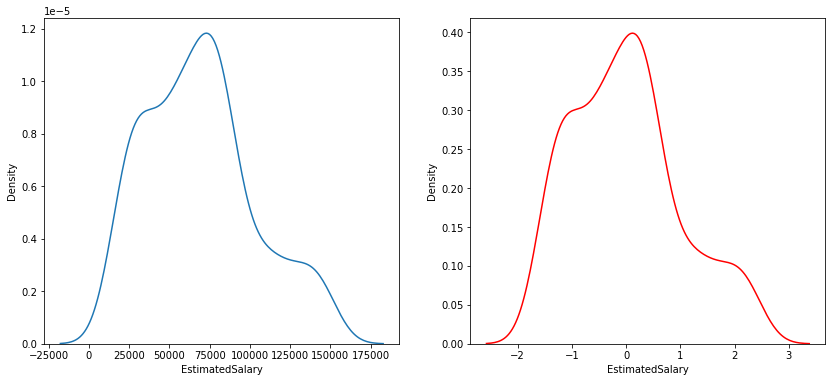

In [60]:
# befor scaling
plt.figure(1, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train, x='Age')
plt.subplot(1, 2, 2)
sns.kdeplot(data=X_train_scaled, x='Age', color='r')
plt.show()

# after scaling
plt.figure(2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train, x='EstimatedSalary')
plt.subplot(1, 2, 2)
sns.kdeplot(data=X_train_scaled, x='EstimatedSalary', color='r')
plt.show()

### **Why scaling is important?**

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

/home/arjun/anaconda3/envs/Project_01/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/arjun/anaconda3/envs/Project_01/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print("Actual : ", accuracy_score(Y_test, y_pred)*100)
print("Scaled : ", accuracy_score(Y_test, y_pred_scaled)*100)

Actual :  65.0
Scaled :  85.83333333333333


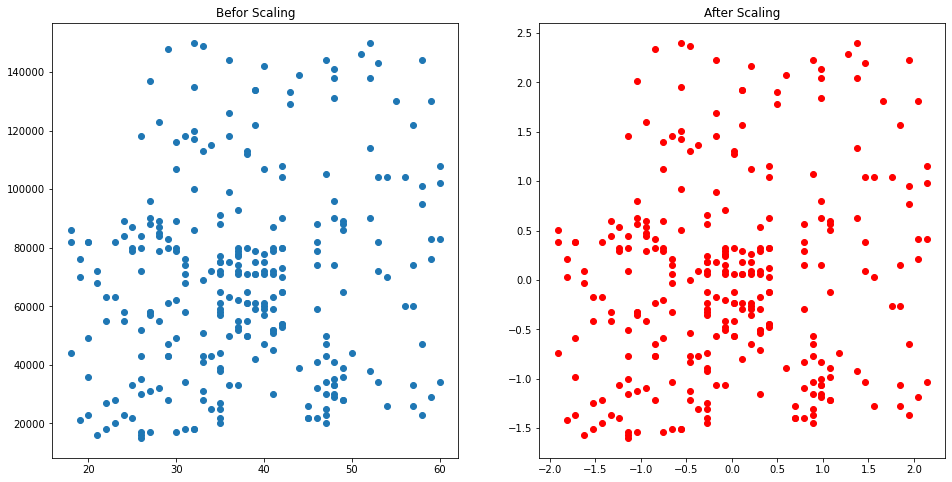

In [65]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("Befor Scaling")
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='r')
plt.title("After Scaling")
plt.show()

#### **DecisionTree**

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [67]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [68]:
print("Actual : ", accuracy_score(Y_test, y_pred)*100)
print("Scaled : ", accuracy_score(Y_test, y_pred_scaled)*100)

Actual :  85.0
Scaled :  85.83333333333333


### **Effect of Outlier**

In [69]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [70]:
df1 = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<ipython-input-70-71b00308850b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [71]:
df1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


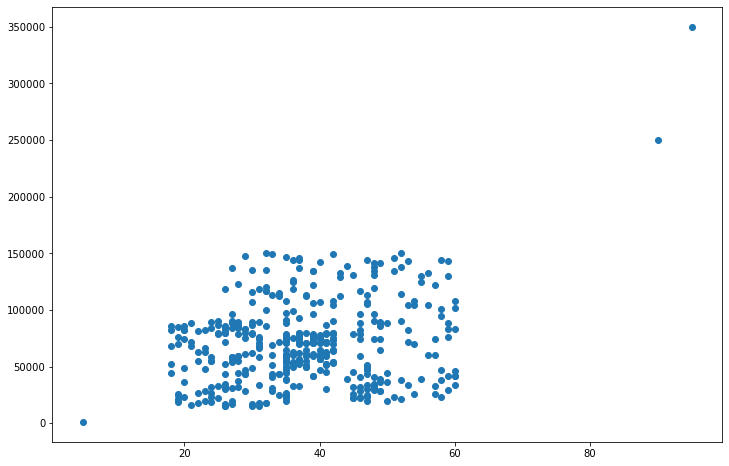

In [72]:
plt.figure(1, figsize=(12, 8))
plt.scatter(df1['Age'], df1['EstimatedSalary'])
plt.show()